## Sales and Marketing Spend Analysis

This notebook explores some of the top US Listed Software companies and their trends in Sales and Marketing (S&M) and Research and Development (R&D) spend.

I do this, firstly by running a simple linear regression to see whether expenditure has a positive effect on Revenues and to what degree.

I further break it down, by analysing to see whether the ratio of spend changes with company size.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import quandl

In [34]:
rc = {
    'axes.axisbelow': True,
    'axes.edgecolor': '#FCFCFC',
    'axes.facecolor': '#3B424D',
    'figure.facecolor': '#3B424D',
    # 'axes.grid': True,
    'axes.labelcolor': '#FCFCFC',
    'axes.linewidth': 2,
    'font.family': 'Arial',
    'grid.color': '#C7CCDB',
    'grid.linestyle': '-',
    'legend.frameon': False,
    'legend.numpoints': 1,
    'legend.scatterpoints': 1,
    'lines.solid_capstyle': 'round',
    'pdf.fonttype': 42,
    'text.color': '#FCFCFC',
    'xtick.color': '#FCFCFC',
    'xtick.direction': 'out',
    'xtick.major.size': 1,
    'xtick.minor.size': 1,
    'ytick.color': '#FCFCFC',
    'ytick.direction': 'out',
    'ytick.major.size': 1,
    'ytick.minor.size': 1,
}
sns.set(context='notebook',
       rc=rc)

In [57]:
quandl.ApiConfig.api_key = "R22kn4TQNknNhxysD9tm"

In [3]:
# Define interested companies
stocks_lookup = {
    1327811:'Workday, Inc.',
    1447669:'Twilio Inc',
    1660134:'Okta, Inc.',
    1404655:'Hubspot Inc',
    1448056:'NEW Relic, Inc.',
    1353283:'Splunk Inc',
    1373715:'Servicenow, Inc.',
    1689923:'Alteryx, Inc.',
    1393052:'Veeva Systems Inc',
    1512673:'Square, Inc.',
    1410384:'Q2 Holdings, Inc.',
    1385867:'Coupa Software Inc',
    1633917:'Paypal Holdings, Inc.',
    1591698:'Paylocity Holding Corp',
    1463172:'Zendesk, Inc.',
    1108524:'Salesforce COM Inc',
    1459417:'2U, Inc.',
    1102993:'Liveperson Inc',
    1092699:'SPS Commerce Inc',
    1355754:'Instructure Inc',
    1437352:'Everbridge, Inc.',
    1384905:'Ringcentral Inc',
    896878: 'Intuit Inc'
}

In [4]:
all_files = glob.glob('./metrics/*-yearly.csv')
all_files

['./metrics/WeightedAverageNumberOfDilutedSharesOutstanding-yearly.csv',
 './metrics/EarningsPerShareDiluted-yearly.csv',
 './metrics/CashAndCashEquivalentsAtCarryingValue-yearly.csv',
 './metrics/NetCashProvidedByUsedInOperatingActivities-yearly.csv',
 './metrics/PropertyPlantAndEquipmentNet-yearly.csv',
 './metrics/ComprehensiveIncomeNetOfTax-yearly.csv',
 './metrics/Assets-yearly.csv',
 './metrics/OperatingIncomeLoss-yearly.csv',
 './metrics/NetCashProvidedByUsedInInvestingActivities-yearly.csv',
 './metrics/Revenues-yearly.csv',
 './metrics/Liabilities-yearly.csv',
 './metrics/AssetsCurrent-yearly.csv',
 './metrics/latest-snapshot-yearly.csv',
 './metrics/NetCashProvidedByUsedInFinancingActivities-yearly.csv',
 './metrics/Goodwill-yearly.csv',
 './metrics/LiabilitiesCurrent-yearly.csv']

In [5]:
st = "'./metrics/WeightedAverageNumberOfDilutedSharesOutstanding-yearly.csv'"
st.split('/')[2].split('.')[0].split('-')[0]

'WeightedAverageNumberOfDilutedSharesOutstanding'

In [6]:
li = []

for path in all_files:
    try:
        interim = pd.read_csv(path)
        col = path.split('/')[2].split('.')[0].split('-')[0]
        interim = interim.set_index(interim.columns[0])
        interim[col] = interim['2016']
        interim = interim[[col]]
        li.append(interim)
    except KeyError:
        continue

In [7]:
master = pd.concat(li, axis=1, ignore_index=False)

In [8]:
len(all_files)

16

In [9]:
# Get interest companies from stocks_lookup
interest = master[master.index.isin(list(stocks_lookup.keys()))]

In [10]:
interest.head(10)

,WeightedAverageNumberOfDilutedSharesOutstanding,EarningsPerShareDiluted,CashAndCashEquivalentsAtCarryingValue,NetCashProvidedByUsedInOperatingActivities,PropertyPlantAndEquipmentNet,ComprehensiveIncomeNetOfTax,Assets,OperatingIncomeLoss,NetCashProvidedByUsedInInvestingActivities,Revenues,Liabilities,AssetsCurrent,NetCashProvidedByUsedInFinancingActivities,Goodwill,LiabilitiesCurrent
SEC ID,,,,,,,,,,,,,,,
1404655,35197000.0,NaN,59702000.0,1.936600e+07,3.020100e+07,-45621000.0,2.597550e+08,-4.466200e+07,-22957000.0,2.709670e+08,1.410550e+08,1.762530e+08,8.473000e+06,9.773000e+06,1.273830e+08
1385867,NaN,NaN,201721000.0,-2.095500e+07,4.642000e+06,NaN,2.838640e+08,-3.542400e+07,-11241000.0,1.337750e+08,1.099720e+08,2.615760e+08,1.415690e+08,6.306000e+06,1.085370e+08
1384905,NaN,NaN,160355000.0,2.970800e+07,3.199400e+07,-27099000.0,2.526290e+08,-2.595200e+07,-16398000.0,3.797240e+08,1.225880e+08,2.059110e+08,9.330000e+06,9.393000e+06,1.160000e+08
1591698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437352,16659561.0,-0.68,60765000.0,9.503000e+06,2.923000e+06,NaN,1.083220e+08,-1.082600e+07,-9020000.0,7.684600e+07,6.597000e+07,8.288300e+07,5.147000e+07,9.676000e+06,6.378300e+07
1463172,93161000.0,NaN,93677000.0,2.452200e+07,6.273100e+07,-106771000.0,4.752850e+08,-1.043260e+08,-182364000.0,3.119990e+08,1.758570e+08,2.798180e+08,3.562700e+07,4.534700e+07,1.672180e+08
1447669,NaN,NaN,305665000.0,1.009100e+07,3.755200e+07,NaN,4.126940e+08,-4.131500e+07,-42425000.0,2.773350e+08,8.324700e+07,3.533800e+08,2.291640e+08,3.565000e+06,7.370400e+07
1373715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896878,265000000.0,3.69,638000000.0,1.401000e+09,1.031000e+09,977000000.0,4.250000e+09,1.242000e+09,371000000.0,4.694000e+09,3.089000e+09,1.614000e+09,-1.940000e+09,1.282000e+09,2.251000e+09


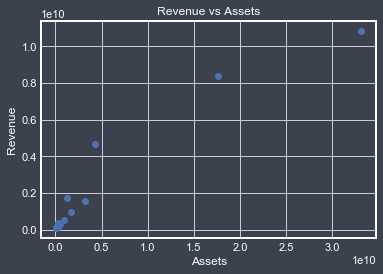

In [11]:
plt.scatter(x='Assets', y='Revenues', data=interest)
plt.title("Revenue vs Assets")
plt.xlabel("Assets")
plt.ylabel("Revenue")
plt.show();

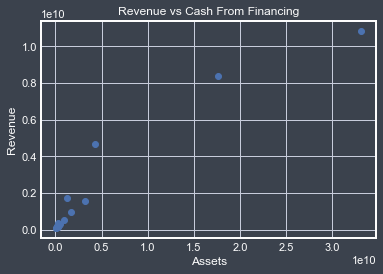

In [12]:
plt.scatter(x='Assets', y='Revenues', data=interest)
plt.title("Revenue vs Cash From Financing")
plt.xlabel("Assets")
plt.ylabel("Revenue")
plt.show();

In [13]:
li = []

for stock in list(stocks_lookup.keys()):
    try:
        file_path = f"./companies/{stock}-yearly.csv"
        interim = pd.read_csv(file_path)
        interim = interim.set_index(interim.columns[0])
        interim = interim[interim.columns[-1]]
        interim['secid'] = stock
        li.append(interim.T)
    except:
        continue


In [14]:
master_financials = pd.concat(li, axis=1, ignore_index=True)

/Users/james.malcolm/anaconda3/envs/taxis/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
master_financials = master_financials.T

In [16]:
master_financials = master_financials.set_index('secid')

In [17]:
master_financials.Revenues.describe()

count    2.000000e+01
mean     1.616380e+09
std      2.955874e+09
min      7.684600e+07
25%      2.154080e+08
50%      2.946670e+08
75%      1.146462e+09
max      1.084200e+10
Name: Revenues, dtype: float64

In [18]:
data = master_financials

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS

# clustering = OPTICS(min_samples=2).fit(X)
# clustering.labels_

In [20]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data.fillna(0))

In [21]:
clustering = OPTICS(min_samples=2).fit(scaled)

In [22]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X_embedded = TSNE(n_components=2).fit_transform(data.fillna(0))
X_embedded.shape

(21, 2)

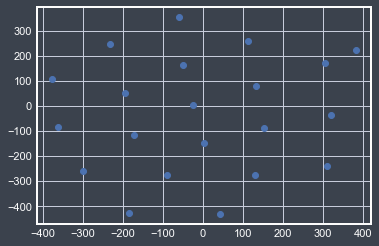

In [24]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

In [25]:
df_subset = pd.DataFrame()

data_subset = data.fillna(0).values
pca = PCA(n_components=3)

pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.72949806 0.17318757 0.04465374]


In [26]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)

[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.114624
[t-SNE] KL divergence after 300 iterations: 0.630301


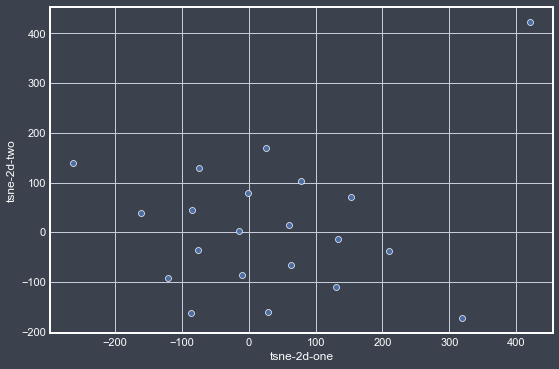

In [27]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(9,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.9
);

## Linear Regression on Revenues

For this section, I just want to gauge whether there is a positive effect of incremental change of R&D and S&M spend.

In [28]:
import statsmodels.formula.api as smf
import numpy as np

results = smf.ols('np.log(Revenues) ~ np.log(SellingAndMarketingExpense) + np.log(ResearchAndDevelopmentExpense)', data=data).fit()

In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(Revenues)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     102.4
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           3.29e-10
Time:                        13:34:16   Log-Likelihood:                -9.2832
No. Observations:                  20   AIC:                             24.57
Df Residuals:                      17   BIC:                             27.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [30]:
joined = interest.join(master_financials, lsuffix='_interest', rsuffix='_metrics', how='inner')

In [31]:
plotting = joined[['Assets', 'Revenues_metrics', 'SellingAndMarketingExpense', 'ResearchAndDevelopmentExpense', 'AdvertisingExpense']]

plotting.drop([1108524, 1633917], inplace=True)

/Users/james.malcolm/anaconda3/envs/taxis/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
import seaborn as sns

In [33]:
sns.set_context('poster')
#sns.set_palette("PuBuGn_d")
sns.set(style="whitegrid")

In [35]:
plotting.head()

,Assets,Revenues_metrics,SellingAndMarketingExpense,ResearchAndDevelopmentExpense,AdvertisingExpense
1404655.0,259755000.0,270967000.0,162647000.0,45997000.0,4200000.0
1385867.0,283864000.0,133775000.0,68562000.0,30262000.0,446000.0
1384905.0,252629000.0,379724000.0,192497000.0,65514000.0,41600000.0
1591698.0,NaN,230701000.0,61832000.0,26736000.0,219000.0
1437352.0,108322000.0,76846000.0,34847000.0,14765000.0,1100000.0


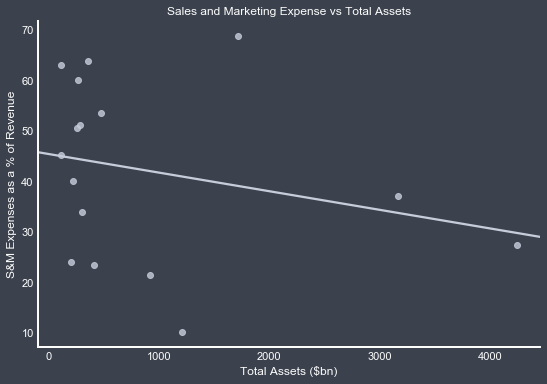

In [51]:
plt.figure(figsize=(9,6))
sns.regplot(x=plotting.iloc[:,0] / 1000000,
            y=(plotting.iloc[:,2] / plotting.iloc[:,1]) * 100,
            ci=None,
            color='#C7CCDB'
           )
sns.despine()
plt.title("Sales and Marketing Expense vs Total Assets")
plt.ylabel("S&M Expenses as a % of Revenue")
plt.xlabel("Total Assets ($bn)")
plt.grid(False)
plt.savefig("sm_expense.png", facecolor="#3B424D")
plt.show();

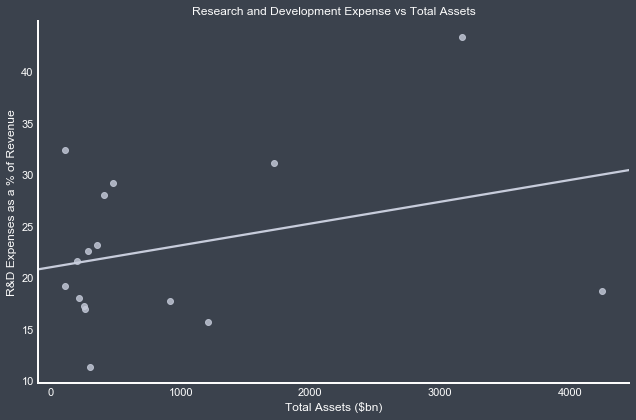

In [52]:
plt.figure(figsize=(9,6))
sns.regplot(x=plotting.iloc[:,0] / 1000000,
            y=(plotting.iloc[:,3] / plotting.iloc[:,1]) * 100,
            ci=None,
            color='#C7CCDB'
           )
sns.despine()
plt.title("Research and Development Expense vs Total Assets")
plt.ylabel("R&D Expenses as a % of Revenue")
plt.xlabel("Total Assets ($bn)")
plt.tight_layout()
plt.grid(False)
plt.savefig("rd_figure.png", facecolor="#3B424D")
plt.show();

In [53]:
plotting['company'] = plotting.index.map(stocks_lookup)

/Users/james.malcolm/anaconda3/envs/taxis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
plotting_s = plotting.set_index('company')
plotting_s['Total'] = (plotting_s['SellingAndMarketingExpense'] + plotting_s['ResearchAndDevelopmentExpense']) / plotting_s['Revenues_metrics'] * 100
plotting_s['Selling_percent'] = plotting_s['ResearchAndDevelopmentExpense'] / plotting_s['Revenues_metrics'] * 100
plotting_s.head()

,Assets,Revenues_metrics,SellingAndMarketingExpense,ResearchAndDevelopmentExpense,AdvertisingExpense,Total,Selling_percent
company,,,,,,,
Hubspot Inc,259755000.0,270967000.0,162647000.0,45997000.0,4200000.0,76.999782,16.975130
Coupa Software Inc,283864000.0,133775000.0,68562000.0,30262000.0,446000.0,73.873295,22.621566
Ringcentral Inc,252629000.0,379724000.0,192497000.0,65514000.0,41600000.0,67.946983,17.253057
Paylocity Holding Corp,NaN,230701000.0,61832000.0,26736000.0,219000.0,38.390818,11.589026
"Everbridge, Inc.",108322000.0,76846000.0,34847000.0,14765000.0,1100000.0,64.560289,19.213752


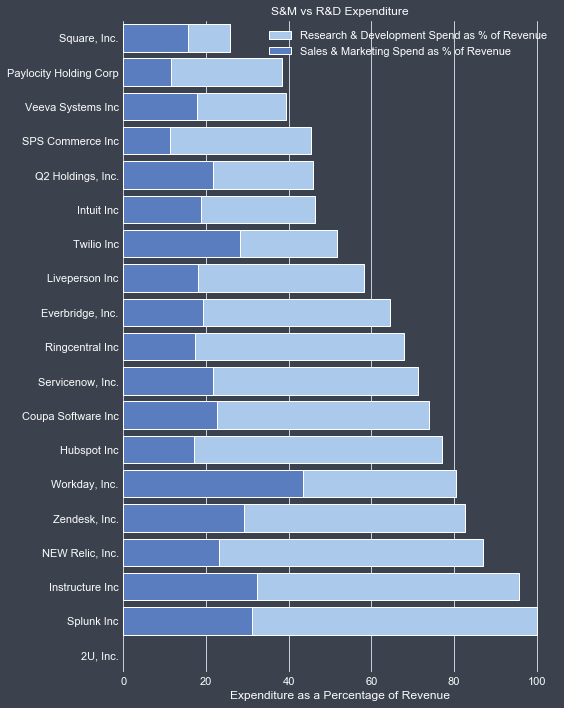

In [55]:
f, ax = plt.subplots(figsize=(8, 10))
# sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="company", data=plotting_s.reset_index().sort_values("Total"), color="b", label="Research & Development Spend as % of Revenue")

sns.set_color_codes("muted")
sns.barplot(x="Selling_percent", y="company", data=plotting_s.reset_index().sort_values("Total"), color="b", label="Sales & Marketing Spend as % of Revenue")

ax.legend(ncol=1, loc="upper right", frameon=False)
ax.set(ylabel="",
       xlabel="Expenditure as a Percentage of Revenue")

plt.title("S&M vs R&D Expenditure")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("Top_Companies.png", facecolor="#3B424D")
sns.despine(left=True, bottom=True)

In [41]:
# sales_percent = (plotting_s.iloc[:,0] / plotting_s.iloc[:,1]) * 100
print(plotting_s.iloc[:,0].sort_values())

company
Everbridge, Inc.          1.083220e+08
Instructure Inc           1.113360e+08
Q2 Holdings, Inc.         2.009800e+08
Liveperson Inc            2.196380e+08
2U, Inc.                  2.443200e+08
Ringcentral Inc           2.526290e+08
Hubspot Inc               2.597550e+08
Coupa Software Inc        2.838640e+08
SPS Commerce Inc          2.983650e+08
NEW Relic, Inc.           3.522690e+08
Twilio Inc                4.126940e+08
Zendesk, Inc.             4.752850e+08
Veeva Systems Inc         9.177000e+08
Square, Inc.              1.211362e+09
Splunk Inc                1.718546e+09
Workday, Inc.             3.166424e+09
Intuit Inc                4.250000e+09
Paylocity Holding Corp             NaN
Servicenow, Inc.                   NaN
Name: Assets, dtype: float64


In [42]:
sales_percent = (plotting_s.iloc[:,2] / plotting_s.iloc[:,1]) * 100
print(sales_percent.sort_values())

company
Square, Inc.              10.175798
Veeva Systems Inc         21.469443
Twilio Inc                23.533633
Q2 Holdings, Inc.         24.153264
Paylocity Holding Corp    26.801791
Intuit Inc                27.460588
SPS Commerce Inc          34.085724
Workday, Inc.             37.203479
Liveperson Inc            40.187361
Everbridge, Inc.          45.346537
Servicenow, Inc.          49.572244
Ringcentral Inc           50.693925
Coupa Software Inc        51.251729
Zendesk, Inc.             53.521646
Hubspot Inc               60.024652
Instructure Inc           63.123196
NEW Relic, Inc.           63.824062
Splunk Inc                68.795259
2U, Inc.                        NaN
dtype: float64


In [693]:
rd_percent = (plotting_s.iloc[:,3] / plotting_s.iloc[:,1]) * 100
print(rd_percent.sort_values())

company
SPS Commerce Inc          11.371737
Paylocity Holding Corp    11.589026
Square, Inc.              15.715673
Hubspot Inc               16.975130
Ringcentral Inc           17.253057
Veeva Systems Inc         17.783521
Liveperson Inc            18.043891
Intuit Inc                18.768641
Everbridge, Inc.          19.213752
Q2 Holdings, Inc.         21.607732
Servicenow, Inc.          21.620420
Coupa Software Inc        22.621566
NEW Relic, Inc.           23.172245
Twilio Inc                28.098148
Zendesk, Inc.             29.188235
Splunk Inc                31.143580
Instructure Inc           32.443182
Workday, Inc.             43.362302
2U, Inc.                        NaN
dtype: float64
